# INF8111 - Fouille de données

## TP2 Automne 2024 - Exploration de données musicales avec clustering

##### Date limite: 09/11

##### Membres de l'équipe:

    - Nom (Matricule) 1
    - Nom (Matricule) 2
    - Nom (Matricule) 3

##### Livrables :

Vous devez soumettre le fichier suivant sur Moodle. Les questions de ce TP totalisent 20 points.
1. (Obligatoire) Ce notebook avec votre code.
2. (Facultatif) Un rapport PDF comprenant les discussions écrites des questions.

##### Présentation

Les techniques de clustering peuvent être utilisées pour suivre l'évolution de la musique au fil du temps en regroupant les chansons sur la base de leurs caractéristiques audio, telles que le volume sonore, le tempo, le caractère dansant et l'énergie. En divisant un ensemble de données musicales en périodes spécifiques, des groupes peuvent être formés pour chaque période, révélant ainsi les tendances et les changements dans les styles musicaux. Cette approche permet aux chercheurs de saisir et de visualiser la progression des caractéristiques musicales, en découvrant des modèles qui pourraient ne pas être évidents dans le cadre d'une analyse traditionnelle.

Dans ce travail, vous utiliserez des techniques de clustering pour extraire des informations significatives sur la musique au cours des dernières décennies. Enfin, votre objectif est d'utiliser les techniques de regroupement pour construire un système de recommandation pour les utilisateurs qui cherchent des suggestions de nouvelles chansons à écouter. Il est prévu que vous utilisiez les méthodes de regroupement précédentes, mais ne vous y limitez pas. Un degré élevé de créativité dans cette partie sera également récompensé.

Toutes les questions seront évaluées sur la base du code écrit, ainsi que de l'explication écrite des résultats (le cas échéant). Lorsqu'elles ne sont pas explicitement interdites, toutes les bibliothèques Python de base (NumPy, Pandas, Scikit-Learn, etc.) peuvent être utilisées. La créativité du code, l'ajout de commentaires (expliquant chaque étape du code) et la vitesse d'exécution du code auront un impact important sur votre évaluation globale. Une question aura un maximum de points si elle s'exécute sous Windows ou Linux, en montrant le résultat attendu et sans lancer d'exceptions. Si la question n'est pas exécutable sous Windows ou Linux, vous perdrez des points. 

-----

## TP2 Autumn 2024 - Music data mining using clustering

##### Due date: 09/11

##### Team Members:

    - Name (Student ID) 1
    - Name (Student ID) 2
    - Name (Student ID) 3
    
##### Deliverables:

You must submit the following file to Moodle. The questions in this TP total 20 points.
1. (Mandatory) This notebook with code.
2. (Optional) PDF report including written discussions of the questions.

#####  Overview

Clustering techniques can be employed to track changes in music over time by grouping songs based on their audio features, such as loudness, tempo, danceability, and energy. By dividing a music dataset into specific time periods, clusters can be formed for each period, revealing trends and shifts in musical styles. This approach allows researchers to capture and visualize the progression of music characteristics, uncovering patterns that might not be evident through traditional analysis.

In this work, you will use clustering techniques to extract meaningful information about music over the last decades. Lastly, your goal is to use clustering techniques to build a recommendation system for users looking for suggestions of new songs to hear. You are expected to use the previous clustering methods, but do not feel limited to them. A high degree of creativity in this part will be equally rewarded.

All questions will be evaluated based on the written code, as well as the written explanation of the results (when applicable). When not explicitly prohibited, all basic Python libraries (NumPy, Pandas, Scikit-Learn, etc.) can be used. The creativity of the code, the addition of comments (explaining each step of the code), and the speed of code execution will greatly impact your overall evaluation. A question will have maximum points if it runs on Windows or Linux, showing the expected result, and without throwing exceptions. If the question is not executable on Windows or Linux, you will lose its points. 

## Partie 1 - Construction des méthodes de clustering/Building the Clustering Methods

### Q1 - Chargement des données/Loading Data **(0.5 pt)**

##### Dans ce travail, vous utiliserez l'ensemble de données musicales *TP2_hits*, qui contient diverses caractéristiques des chansons des dernières décennies, telles que les noms des chansons, les noms des artistes et les caractéristiques musicales.

##### Pour commencer votre travail, chargez l'ensemble de données musicales *TP2_hits.csv* et affichez ses 5 premiers résultats.

-----

##### In this work, you will use the *TP2_hits* music dataset, which contains various features of songs from the past decades, such as song names, artist names, and musical characteristics.

##### To begin your work, load the *TP2_hits.csv* music dataset and display its top 5 results.

In [104]:
### CODE
import pandas as pd

df = pd.read_csv('TP2_hits.csv', sep=';')
df.head(5)

,song_name,name_artists,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,key,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,"thank u, next",['Ariana Grande'],87,True,Solo,1,79,2019-02-08,207320,1,...,4,0.22900,0.717,0.653,0.000000,0.1010,-5.634,0.0658,0.412,106.966
1,Without Me,['Halsey'],87,True,Solo,1,79,2018-10-04,201661,6,...,4,0.29700,0.752,0.488,0.000009,0.0936,-7.050,0.0705,0.533,136.041
2,SICKO MODE,['Travis Scott'],86,True,Solo,1,79,2018-08-03,312820,8,...,4,0.00513,0.834,0.730,0.000000,0.1240,-3.714,0.2220,0.446,155.008
3,Sunflower - Spider-Man: Into the Spider-Verse,"['Post Malone', 'Swae Lee']",92,False,Collaboration,2,79,2018-12-14,158040,2,...,4,0.55600,0.760,0.479,0.000000,0.0703,-5.574,0.0466,0.913,89.911
4,High Hopes,['Panic! At The Disco'],86,False,Solo,1,78,2018-06-22,190947,5,...,4,0.19300,0.579,0.904,0.000000,0.0640,-2.729,0.0618,0.681,82.014


### Q2 - Transformer et normaliser les données/Transforming and Normalizing Data **(1 pt)**

##### Lorsque les caractéristiques ont des échelles très différentes, il est important de ramener toutes les valeurs à une échelle commune. Dans cette question, vous devez appliquer les transformations et normalisations nécessaires à l'ensemble de données, en fonction de votre point de vue.

##### Conseil: vous devez supprimer les noms des chansons et des artistes et vous concentrer uniquement sur les caractéristiques numériques.

-----

##### When features have significantly different scales, it is important to bring all the values to a common scale. In this question, you should apply the necessary transformations and normalizations to the dataset, based on your perspective.

##### Tip: You should remove the song and artist names and focus only on the numerical features.

In [108]:
### CODE
from sklearn.preprocessing import LabelEncoder, StandardScaler

def normalize(dataset):
    scaler = StandardScaler()
    original_columns = dataset.columns
    dataset[original_columns] = scaler.fit_transform(dataset[original_columns])
    return dataset

def preprocess_dataset(dataset):
    label_encoder = LabelEncoder()
    dataset = dataset.drop(columns=['song_name', 'name_artists'])
    dataset["explicit"] = label_encoder.fit_transform(dataset["explicit"])
    dataset["song_type"] = label_encoder.fit_transform(dataset["song_type"])
    dataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce')
    dataset['release_date'] = dataset['release_date'].astype('int64')
    dataset = normalize(dataset)

    return dataset

df_numeric = preprocess_dataset(df)
df_numeric.head(5)

,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,2.183815,2.715631,0.286814,-0.286814,0.415080,1.573543,-0.284573,-1.191700,0.628977,0.191151,-0.084477,0.752414,0.044000,-0.265119,-0.573626,0.636411,-0.120932,-0.715145,-0.479997
1,2.183815,2.715631,0.286814,-0.286814,0.415080,1.522360,-0.378464,0.206497,0.628977,0.191151,0.173298,0.986453,-0.807371,-0.265064,-0.618331,0.211753,-0.065084,-0.204419,0.549077
2,2.141359,2.715631,0.286814,-0.286814,0.415080,1.497373,1.465822,0.765776,0.628977,0.191151,-0.933125,1.534772,0.441307,-0.265119,-0.434680,1.212219,1.735117,-0.571635,1.220390
3,2.396098,-0.368239,-3.486576,3.486576,0.415080,1.550974,-1.102198,-0.912061,0.628977,0.191151,1.155117,1.039948,-0.853810,-0.265119,-0.759089,0.654405,-0.349076,1.399513,-1.083638
4,2.141359,-0.368239,0.286814,-0.286814,0.326188,1.480447,-0.556225,-0.073143,0.628977,0.191151,-0.220946,-0.170367,1.339116,-0.265119,-0.797148,1.507620,-0.168462,0.420270,-1.363142


### Q3 - Clustering avec K-Means/Clustering with K-Means **(3 pt)**

##### Une technique de clustering largement utilisée est **K-Means**. K-Means est un algorithme qui répartit les données en un nombre prédéfini de clusters (K). Il assigne chaque point de données au groupe le plus proche en fonction de la distance au centroïde du groupe, qui représente la position moyenne des points au sein de ce groupe.

##### Dans cette question, vous devez regrouper l'ensemble de données à l'aide de K-Means et fournir une analyse textuelle des résultats. Votre méthode est-elle efficace pour regrouper les chansons présentant des caractéristiques similaires?

##### Les résultats du regroupement par K-Means dépendent fortement des centroïdes initiaux sélectionnés. Que pouvez-vous faire, dans votre code, pour réduire ces effets?

##### Enfin, comment sélectionner, dans votre code, le nombre optimal de clusters? Existe-t-il des mesures qui peuvent vous aider?

-----

##### A widely used clustering technique is **K-Means**. K-Means is an algorithm that partitions data into a predefined number of clusters (K). It works by assigning each data point to the nearest cluster based on the distance to the cluster's centroid, which represents the average position of the points within that cluster.

##### In this question, you must cluster the dataset using K-Means and provide a textual analysis of the results. Is your method effective in grouping songs with similar characteristics?

##### The results of K-Means clustering are highly dependent on the initial centroids selected. What can you do to reduce these effects?

##### Finally, how do you select the optimal number of clusters? Are there any metrics that can help with this?

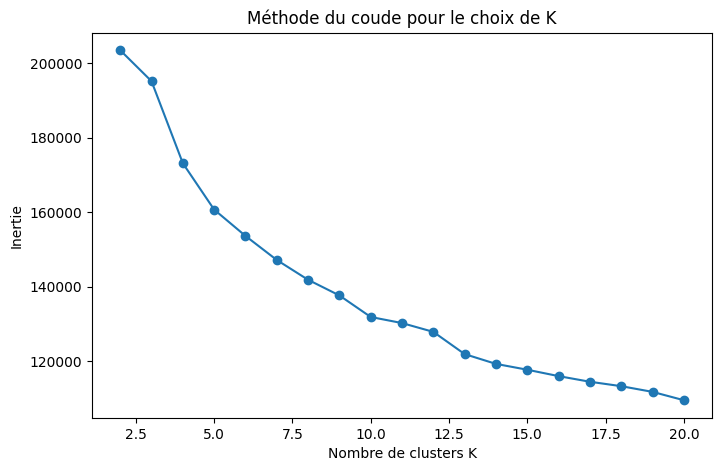

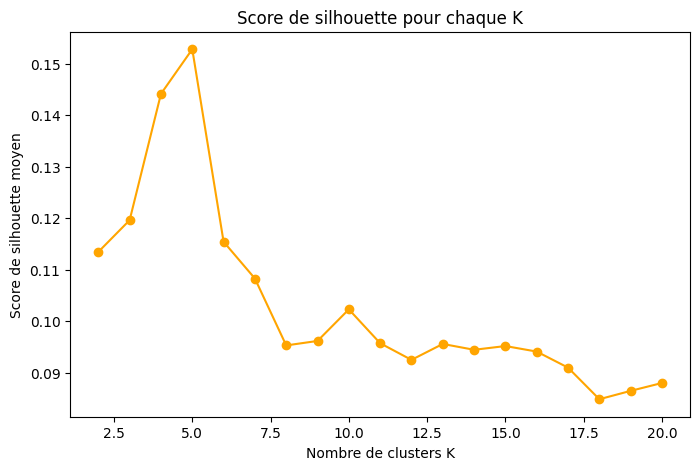

In [3]:
### CODE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouette_scores = []
K_range = range(2, 21) # Silhouette score requires at least 2 clusters

for K in K_range:
    kmeans = KMeans(n_clusters=K, init='k-means++',  random_state=0)
    kmeans.fit(df_numeric[df_numeric.columns])
    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_numeric[df_numeric.columns], kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour le choix de K')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score de silhouette moyen')
plt.title('Score de silhouette pour chaque K')
plt.show()

##### Discussions:
1- Votre méthode est-elle efficace pour regrouper les chansons présentant des caractéristiques similaires?

2- Les résultats du regroupement par K-Means dépendent fortement des centroïdes initiaux sélectionnés. Que pouvez-vous faire, dans votre code, pour réduire ces effets?

3- Enfin, comment sélectionner, dans votre code, le nombre optimal de clusters? Existe-t-il des mesures qui peuvent vous aider?

### Q4 - Réduction de la dimensionnalité et sélection des caractéristiques/Reducing dimension and selecting features **(2.5 pt)**

##### Lors d'un clustering avec de nombreuses caractéristiques, comme c'est le cas dans ce TP, deux techniques peuvent être utilisées : la **réduction de la dimensionnalité** et/ou la **sélection des caractéristiques**. Ces techniques améliorent les résultats du clustering en réduisant le bruit et en se concentrant sur les données les plus pertinentes, ce qui conduit à des regroupements plus clairs et plus significatifs.

##### Dans cette question, vous devez créer une méthode pour réduire les dimensions ou sélectionner les meilleures caractéristiques de l'ensemble de données. Vous êtes libre d'utiliser l'une ou l'autre de ces techniques, ou les deux. Vos résultats seront évalués sur la base de vos métriques, et non sur l'utilisation des deux techniques.

##### Après, regroupez les données en utilisant à nouveau K-Means, en employant les mêmes métriques que celles de la Q3. Enfin, rédigez une évaluation textuelle des différences trouvées.

-----

##### When clustering with many features, as is the case in this TP, two techniques that we can use are **dimensionality reduction** and/or **feature selection**. These techniques enhance clustering results by reducing noise and focusing on the most relevant data, leading to clearer, more meaningful groupings.

##### In this question, you must create a method to reduce the dimensions or select the best features from the dataset. It is up to you to use one or both techniques. Your results will be evaluated based on your metrics, not on the use of both techniques.

##### Then, cluster the data using K-Means again, employing the same metrics from Q3. Finally, write a textual evaluation of the differences found.

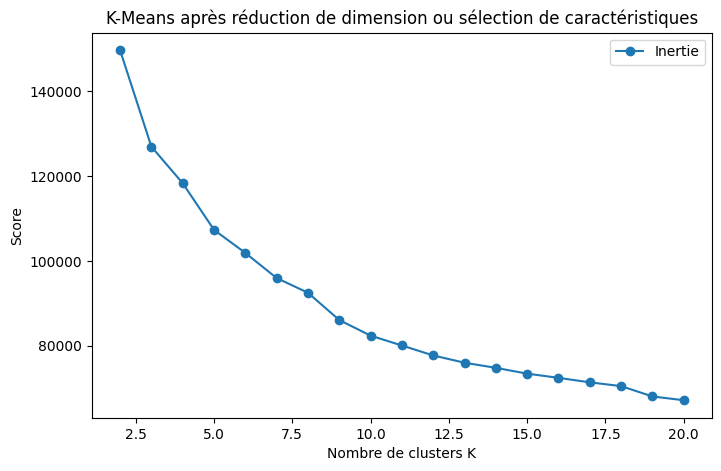

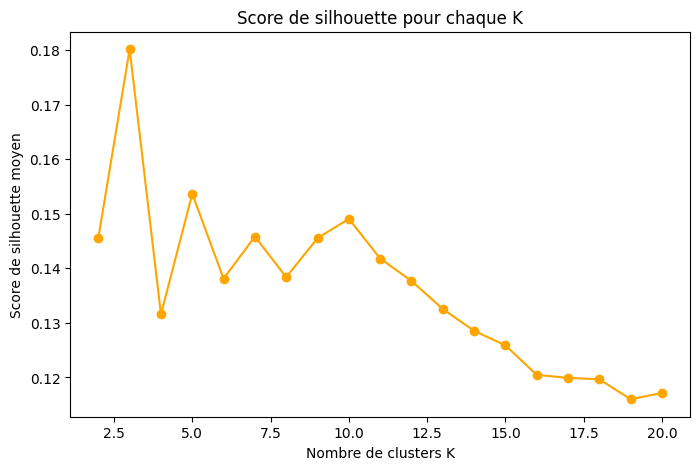

In [5]:
### CODE
from sklearn.decomposition import PCA

# Réduction de dimensionnalité
pca = PCA(n_components=0.75)
df_pca = pca.fit_transform(df_numeric)

inertias = []
silhouette_scores = []
K_range = range(2, 21)

for K in K_range:
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', label='Inertie')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score')
plt.title('K-Means après réduction de dimension ou sélection de caractéristiques')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score de silhouette moyen')
plt.title('Score de silhouette pour chaque K')
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

y_random = np.random.randint(2, size=len(df_numeric))

rf = RandomForestClassifier()
rf.fit(df_numeric, y_random)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'feature': df_numeric.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

selected_features_rf = feature_importance_df[feature_importance_df['importance'] > 0.07]['feature'].tolist()


df_reduced = df_numeric[selected_features_rf]

df_reduced.head()


,acousticness,tempo,duration_ms,liveness,loudness,valence,danceability,energy,speechiness,release_date
0,-0.084477,-0.479997,-0.284573,-0.573626,0.636411,-0.715145,0.752414,0.044000,-0.120932,1.573543
1,0.173298,0.549077,-0.378464,-0.618331,0.211753,-0.204419,0.986453,-0.807371,-0.065084,1.522360
2,-0.933125,1.220390,1.465822,-0.434680,1.212219,-0.571635,1.534772,0.441307,1.735117,1.497373
3,1.155117,-1.083638,-1.102198,-0.759089,0.654405,1.399513,1.039948,-0.853810,-0.349076,1.550974
4,-0.220946,-1.363142,-0.556225,-0.797148,1.507620,0.420270,-0.170367,1.339116,-0.168462,1.480447


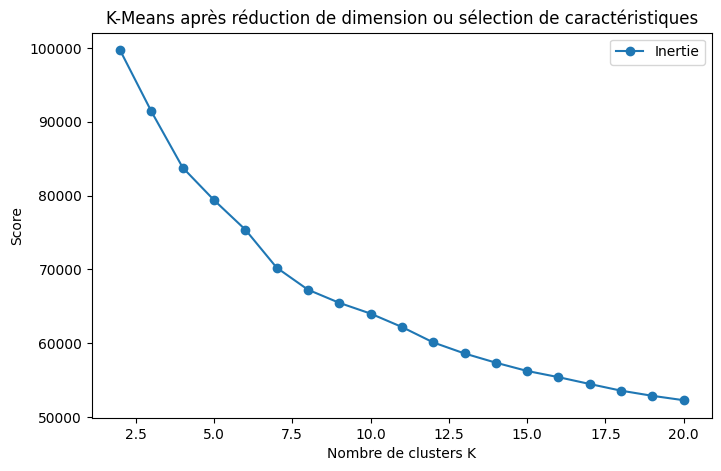

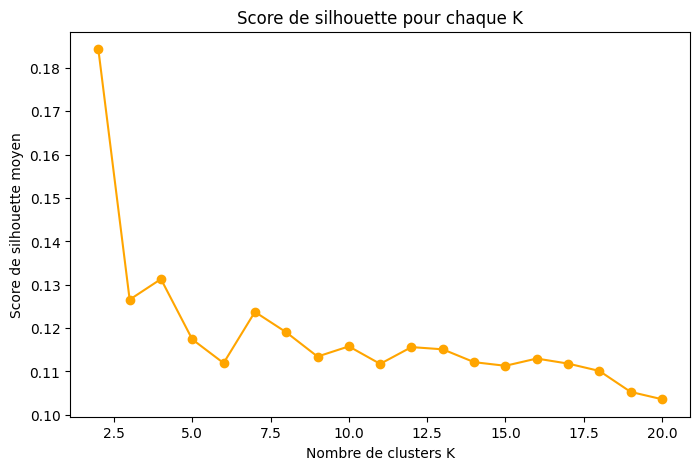

In [103]:
inertias = []
silhouette_scores = []
K_range = range(2, 21)

for K in K_range:
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=0)
    kmeans.fit(df_reduced)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_reduced, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', label='Inertie')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score')
plt.title('K-Means après réduction de dimension ou sélection de caractéristiques')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Nombre de clusters K')
plt.ylabel('Score de silhouette moyen')
plt.title('Score de silhouette pour chaque K')
plt.show()

##### Discussions:
1- Rédigez une évaluation textuelle des différences trouvées

## Partie 2 - Analyse de clustering/Clustering analysis

### Q5 - Évaluer les changements dans la musique avec l'analyse des centroïdes/Evaluating the Changes in Music Using Centroid Analysis **(4 pt)**

##### Une autre technique largement utilisée en matière de clustering est l'**analyse centroïde**. L'analyse centroïde est utile pour interpréter les résultats des clusters, car elle révèle les tendances centrales des regroupements et met en évidence les principales caractéristiques et différences entre les groupes.

##### Vous allez maintenant travailler en tant que scientifique des données, en utilisant l'analyse centroïde pour examiner l'ensemble de données musicales. Vous devez diviser l'ensemble de données sur les hits en fonction des valeurs *release_date* suivantes:

1) De 1995 à 2000  
2) De 2001 à 2010  
3) De 2011 à 2019  

##### Rédigez ensuite une évaluation de l'évolution de la musique sur ces trois tranches temporelles. Vous devriez utiliser l'analyse des centroïdes pour suivre le mouvement des centroïdes des clusters K-Means au fil du temps, ce qui peut indiquer des changements dans les tendances musicales.

##### Conseil (non obligatoire): Sélectionnez deux caractéristiques et suivez leurs centroïdes pour observer leur évolution. Toutefois, les approches créatives sont vivement encouragées.

-----

##### Another widely used technique in clustering is **centroid analysis**. Centroid analysis is useful for interpreting clustering results, as it reveals the central tendencies of clusters and highlights key characteristics and differences between groups.

##### Now, you will work as a data scientist, using centroid analysis to examine the music dataset. You must split the hits dataset based on the following *release_date* values:

1) From 1995 to 2000  
2) From 2001 to 2010  
3) From 2011 to 2019  

##### Then, write an evaluation of the changes in music across these three time slices. You should use centroid analysis to track the movement of K-Means cluster centroids over time, which can indicate shifts in musical trends.

##### Tip (not mandatory): Select two features and track their centroids to observe how they change. However, creative approaches are highly encouraged.

In [47]:
### CODE
# On a besoin de la colonne de release date initial afin de séparer notre dataset
df_numeric_with_date = df_numeric.copy()
df_numeric_with_date['release_datetime'] = pd.to_datetime(df['release_date'], errors='coerce')

df_1995_2000 = df_numeric_with_date[(df_numeric_with_date['release_datetime'] >= '1995-01-01') & (df_numeric_with_date['release_datetime'] <= '2000-12-31')]
df_2001_2010 = df_numeric_with_date[(df_numeric_with_date['release_datetime'] >= '2001-01-01') & (df_numeric_with_date['release_datetime'] <= '2010-12-31')]
df_2011_2019 = df_numeric_with_date[(df_numeric_with_date['release_datetime'] >= '2011-01-01') & (df_numeric_with_date['release_datetime'] <= '2019-12-31')]

In [48]:
def compute_centroid(df, features):
    return df[features].mean().values

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

periods = {
    '1995-2000': df_1995_2000,
    '2001-2010': df_2001_2010,
    '2011-2019': df_2011_2019
}

centroids = {period: compute_centroid(df, features) for period, df in periods.items()}
centroids_df = pd.DataFrame.from_dict(centroids, orient='index', columns=features).reset_index()
centroids_df.rename(columns={'index': 'Period'}, inplace=True)

centroids_df.head()

,Period,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,1995-2000,-0.010661,0.124892,-0.072879,-0.069279,-0.032463,-0.209362,-0.068688,0.106179,-0.110752
1,2001-2010,-0.064239,-0.052724,0.131192,-0.044968,0.010315,0.175062,0.022323,0.033290,0.009406
2,2011-2019,0.073188,0.000626,-0.107368,0.078728,0.003448,-0.093404,0.006767,-0.082698,0.039240


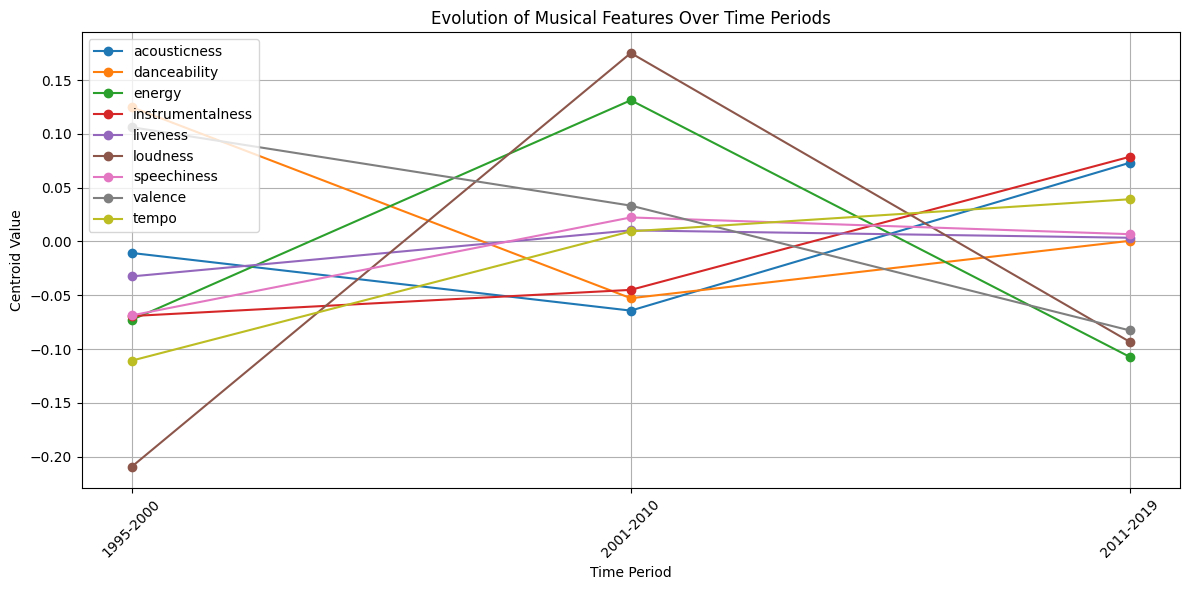

In [49]:
plt.figure(figsize=(12, 6))
for feature in centroids_df.columns[1:]:  # Skip 'Period'
    plt.plot(centroids_df['Period'], centroids_df[feature], marker='o', label=feature)

plt.title('Evolution of Musical Features Over Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Centroid Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Évaluation de l'évolution de la musique
Réponse

### Q6 - Analyse des valeurs aberrantes avec DBSCAN/Analyzing outliers using DBSCAN **(2.5 pts)**

##### **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering qui regroupe les points en fonction de leur densité dans l'espace. Il identifie les points centraux, c'est-à-dire ceux qui ont un nombre minimum de points voisins à une certaine distance (*epsilon*). Ces points centraux forment le centre d'un cluster, et tous les points voisins situés à moins de *epsilon* sont affectés à ce cluster.

##### Une caractéristique importante de DBSCAN est sa capacité à identifier les valeurs aberrantes potentielles. Cette analyse est cruciale pour identifier les chansons qui diffèrent significativement des autres.

##### Dans cette question, vous allez regrouper les données à l'aide de DBSCAN. Tracez les données résultantes à l'aide d'une technique de réduction de la dimensionnalité. Ensuite, sélectionnez trois points aberrants et rédigez une analyse expliquant pourquoi ils sont considérés comme aberrants. La valeur *epsilon* est-elle importante pour identifier ces valeurs aberrantes?

-----

##### **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups points based on their density in space. It works by identifying core points—those that have a minimum number of neighboring points within a certain distance (*epsilon*). These core points form the center of a cluster, and all nearby points within *epsilon* are assigned to that cluster.

##### One important characteristic of DBSCAN is its ability to identify potential outliers. This analysis is crucial for identifying songs that differ significantly from others.

##### In this question, you will cluster the data using DBSCAN. Plot the resulting data using a dimensionality reduction technique. Then, select three outlier points and write an analysis of why they are considered outliers. Is the *epsilon* value important for identifying these outliers?

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np

# Calculate Mean Distance to choose epsilon value for DBSCAN

distances = pairwise_distances(df_numeric)

mean_distance = np.mean(distances[distances > 0])
print("Mean distance:", mean_distance)

Mean distance: 5.905524472392927


In [84]:
### CODE
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

epsilon = 3.2
min_samples = 50
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(df_numeric)

tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df_numeric)

tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = clusters

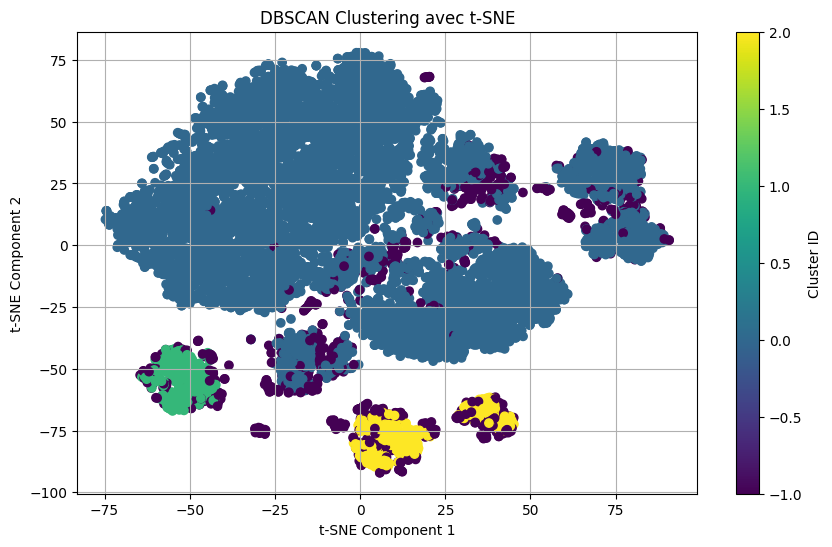

In [85]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster ID')
plt.title('DBSCAN Clustering avec t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

In [82]:
outliers = tsne_df[tsne_df['Cluster'] == -1]
print(outliers)

           TSNE1      TSNE2  Cluster
8      31.740040   0.828331       -1
11     67.578438  14.914568       -1
30    -13.347533 -23.502184       -1
38    -11.470660 -49.893356       -1
48     82.776344  13.693447       -1
...          ...        ...      ...
11928  -7.356757 -73.162636       -1
11935 -17.454914 -59.580524       -1
11940  -5.737045 -72.101166       -1
11945 -26.179775 -58.060917       -1
11949  -7.433185 -72.321655       -1

[565 rows x 3 columns]


#### Discussion

### Q7 - Analyser les groupes avec le clustering hiérarchique/Analyzing groups with hierarchial clustering **(2.5 pts)**

##### **Le clustering hiérarchique** est une méthode de clustering sur la base d'une hiérarchie ou d'une structure arborescente. Elle construit des clusters imbriquées en fusionnant des clusters plus petits (approche agglomérative) ou en divisant des clusters plus grands (approche divisive). Le processus se poursuit jusqu'à ce que tous les points de données se trouvent dans un seul cluster ou que chaque point de données constitue son propre cluster.

##### Ce type de regroupement est très utile pour analyser les hiérarchies qui en résultent. Vous pouvez utiliser cette méthode pour examiner les relations entre les clusters et les modèles à plusieurs niveaux qui peuvent ne pas être facilement visibles avec d'autres méthodes.

##### Dans cette question, vous allez regrouper les données en utilisant le clustering hiérarchique avec la méthode de Ward. Toutes les caractéristiques sont-elles utiles dans ce regroupement? Représentez les données obtenues dans un dendrogramme. Rédigez ensuite une analyse des résultats obtenus.

-----

##### **Hierarchical clustering** is a method of grouping data points into clusters based on a hierarchy or tree-like structure. It builds nested clusters by either merging smaller clusters (agglomerative approach) or splitting larger ones (divisive approach). The process continues until all data points are in a single cluster or each data point is its own cluster.

##### This type of clustering is very useful for analyzing the resulting hierarchies. You can use this method to examine cluster relationships and multi-level patterns that may not be easily visible with other methods.

##### In this question, you will cluster the data using hierarchical clustering with Ward's linkage method. Are all the features useful in this clustering? Plot the resulting data in a dendrogram. Afterward, write an analysis of the results you find.

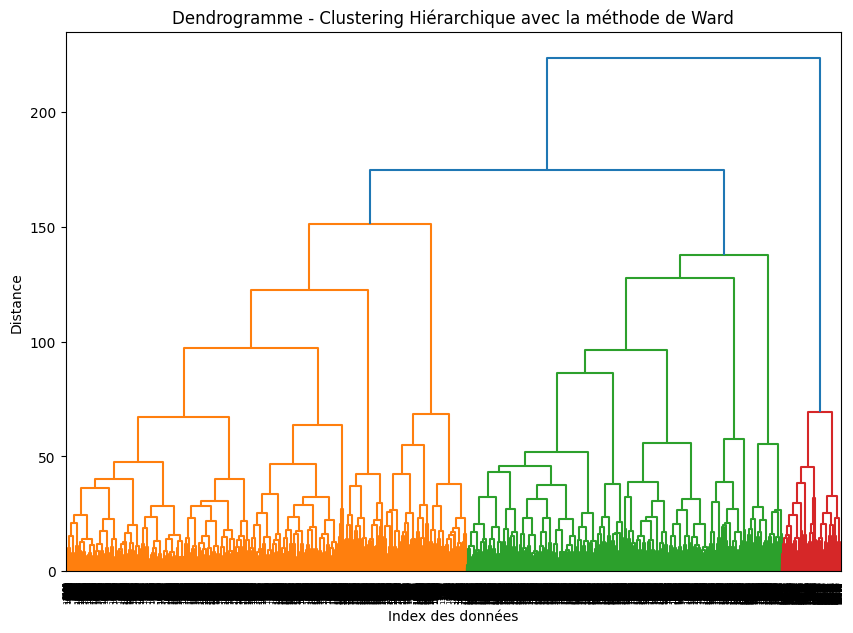

In [ ]:
### CODE
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_numeric, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df_numeric.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramme - Clustering Hiérarchique avec la méthode de Ward')
plt.xlabel('Index des données')
plt.ylabel('Distance')
plt.show()

## Partie 3 - Systèmes de recommandation avec clustering/Recommendation systems using clustering

### Q8 - Recommander des chansons/Recommending Songs **(4 pt)**

#### **Les systèmes de recommandation** sont des algorithmes conçus pour suggérer des éléments pertinents aux utilisateurs en fonction de leurs préférences, de leur comportement ou de leurs interactions passées. Ils jouent un rôle crucial dans le filtrage de grandes quantités de données, en fournissant des recommandations personnalisées pour chaque utilisateur.

#### Dans cette question, vous devez construire un système de recommandation en utilisant le clustering. En utilisant la technique de votre choix, trouvez les meilleures suggestions musicales pour les chansons suivantes. Cependant, utilisez l'ensemble de données complet, *TP2_nonhits.csv*, pour cette tâche.  Vous pouvez télécharger le jeu de données ici: https://1drv.ms/f/s!AokVPhU6GPPQkv4NipxQg8IFaeRN6w. 

1) Id 3 - Ariana Grande, *Fake Smile*
2) Id 13252 - Kanye West, *All of the Lights* 
3) Id 284228 - Metallica, *Nothing Else Matters*
4) Id 386296 - Céline Dion, *Pour que tu m'aimes encore*  
5) Id 511119 - Aerosmith, *Dream On*  

#### Comme d'habitude, fournissez une analyse écrite de vos résultats. Toutes les caractéristiques sont-elles utiles? Existe-t-il une technique de clustering plus efficace pour construire un système de recommandation? Est-ce qu'il y a des caractéristiques mieux adaptées pour indiquer différents styles, différents artistes?

-----

#### **Recommendation systems** are algorithms designed to suggest relevant items to users based on their preferences, behavior, or past interactions. They play a crucial role in filtering vast amounts of data, providing personalized recommendations for each user.

#### In this question, you must build a recommendation system using clustering. Using the technique of your choice, find the best music suggestions for the following songs. However, use the full dataset, *TP2_nonhits.csv*, for this task. You can download the dataset here: https://1drv.ms/f/s!AokVPhU6GPPQkv4NipxQg8IFaeRN6w. 

1) Id 3 - Ariana Grande, *Fake Smile*  
2) Id 13252 - Kanye West, *All of the Lights*  
3) Id 284228 - Metallica, *Nothing Else Matters*  
4) Id 386296 - Celine Dion, *Pour que tu m'aimes encore*  
5) Id 511119 - Aerosmith, *Dream On*  

#### As usual, provide a written analysis of your results. Are all the features useful? Is there any clustering technique that is more effective for building a recommendation system? Are there features better suited to indicate different styles, different artists?

In [121]:
### CODE
full_df = pd.read_csv('TP2_nonhits.csv', sep=';')
full_df.head(5)

C:\Users\mat_f\AppData\Local\Temp\ipykernel_19836\1180432705.py:2: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv('TP2_nonhits.csv', sep=';')


,song_id,song_name,name_artists,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,needy,['Ariana Grande'],76,True,Solo,1,79,2019-02-08,171573,...,4,0.78,0.647,0.309,7.41e-06,0.202,-7.948,0.0366,0.195,87.045
1,1,NASA,['Ariana Grande'],76,False,Solo,1,79,2019-02-08,182000,...,4,0.451,0.747,0.458,0,0.252,-6.891,0.303,0.47,75.029
2,2,bloodline,['Ariana Grande'],74,True,Solo,1,79,2019-02-08,216893,...,4,0.0815,0.758,0.665,0.000157,0.216,-5.188,0.0774,0.643,151.976
3,3,fake smile,['Ariana Grande'],73,True,Solo,1,79,2019-02-08,208880,...,4,0.329,0.45,0.619,0,0.319,-7.412,0.372,0.427,83.3
4,4,bad idea,['Ariana Grande'],74,False,Solo,1,79,2019-02-08,267107,...,4,0.0268,0.847,0.579,0.0545,0.102,-5.314,0.0719,0.569,137.998


In [131]:
def preprocess_full_dataset(dataset):
    label_encoder = LabelEncoder()
    dataset = dataset.drop(columns=['song_id', 'song_name', 'name_artists'])
    dataset["explicit"] = label_encoder.fit_transform(dataset["explicit"])
    dataset["song_type"] = label_encoder.fit_transform(dataset["song_type"])
    dataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce')
    dataset['release_date'] = dataset['release_date'].astype('int64')

    numeric_columns = [
        'duration_ms', 'key', 'mode', 'time_signature', 
        'acousticness', 'danceability', 'energy', 'instrumentalness', 
        'liveness', 'loudness', 'speechiness', 'valence', 'tempo'
    ]
    
    for column in numeric_columns:
        dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

    dataset = normalize(dataset)
    dataset = dataset.dropna()

    return dataset

full_df_numeric = preprocess_full_dataset(full_df)
full_df_numeric.head(5)

,popularity,explicit,song_type,num_artists,num_available_markets,release_date,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,5.645966,3.790501,0.299158,-0.299158,0.375298,1.304034,-0.601018,0.505150,-1.548946,0.231003,1.364988,0.378975,-1.045493,-0.682629,-0.024999,0.434325,-0.381116,-1.227120,-1.128802
1,5.645966,-0.263817,0.299158,-0.299158,0.375298,1.304034,-0.492944,0.222913,0.645600,0.231003,0.370702,0.983012,-0.420891,-0.682649,0.232677,0.661677,2.077781,-0.167265,-1.535458
2,5.482264,3.790501,0.299158,-0.299158,0.375298,1.304034,-0.131284,-0.906035,-1.548946,0.231003,-0.745981,1.049456,0.446844,-0.682223,0.047151,1.027978,-0.004528,0.499480,1.068646
3,5.400413,3.790501,0.299158,-0.299158,0.375298,1.304034,-0.214337,1.069624,0.645600,0.231003,0.002000,-0.810979,0.254014,-0.682649,0.577961,0.549614,2.714657,-0.332988,-1.255544
4,5.482264,-0.263817,0.299158,-0.299158,0.375298,1.304034,0.389175,-1.188272,0.645600,0.231003,-0.911293,1.587050,0.086336,-0.534735,-0.540349,1.000877,-0.055294,0.214283,0.595591


In [133]:
full_df_reduced = full_df_numeric[selected_features_rf]
full_df_reduced.head(5)

,acousticness,tempo,duration_ms,liveness,loudness,valence,danceability,energy,speechiness,release_date
0,1.364988,-1.128802,-0.601018,-0.024999,0.434325,-1.227120,0.378975,-1.045493,-0.381116,1.304034
1,0.370702,-1.535458,-0.492944,0.232677,0.661677,-0.167265,0.983012,-0.420891,2.077781,1.304034
2,-0.745981,1.068646,-0.131284,0.047151,1.027978,0.499480,1.049456,0.446844,-0.004528,1.304034
3,0.002000,-1.255544,-0.214337,0.577961,0.549614,-0.332988,-0.810979,0.254014,2.714657,1.304034
4,-0.911293,0.595591,0.389175,-0.540349,1.000877,0.214283,1.587050,0.086336,-0.055294,1.304034


In [ ]:
def create_kmeans_model(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(df)
    return kmeans

n_clusters = 10
kmeans_model = create_kmeans_model(full_df_reduced, n_clusters)
full_df['cluster'] = full_df_reduced['cluster']

In [146]:
def recommend_songs(df, song_id, n_recommendations=5):
    selected_song = df[df.index == song_id]

    cluster_id = selected_song['cluster'].values[0]
    recommendations = df[df['cluster'] == cluster_id]
    
    recommendations = recommendations[recommendations.index != song_id]
    
    return recommendations.sample(n=min(n_recommendations, recommendations.shape[0]))

In [147]:
song_ids = [3, 13252, 284228, 386296, 511119]

for song_id in song_ids:
    recommended_songs = recommend_songs(full_df, song_id)
    
    # Print the song ID
    print(f"\nRecommendations for Song ID: {song_id}")
    print(recommended_songs[['song_name', 'name_artists']].to_string(index=False))


Recommendations for Song ID: 3
                song_name                 name_artists
                  So Good    ['Talib Kweli', 'Hi-Tek']
             It Aint Over             ['Craigenstein']
            Vibes (Intro)                   ['Uptown']
Memories (feat. Kid Cudi) ['David Guetta', 'Kid Cudi']
  This Is Not 4 Da Public                   ['Smooth']

Recommendations for Song ID: 13252
                                                                                     song_name                        name_artists
                                                                                    First Date ['Instrumental Jazz Music Ambient']
                                                                                   As the Deer                ['Daniel Rodriguez']
Variations on a Theme by Haydn, Op. 56a: II. Variation I - Poco più animato (Andante con moto)    ['Royal Philharmonic Orchestra']
                                                                              